## AASD 4011: Applied Mathematical Concepts for Deep Learning
## Final Project: "Benchmarking Sentiment Analysis Neural Networks Models"



### Problem Definition


Our Project takes a Notebook from the Deep Learning 1 class as a baseline. A fully connected Neural Network is used for Movie Sentiment Analysis and a base LSTM  Neural Network is also included to solve the same problem.

### Our Analysis
We analyze the effect of changing different parameters in the LSTM and Dense Neural Networks, and include an additional GRU model to benchmark all of them. The initial parameters to be changed and benchmarked would be the following (but more may be included if our analysis finds interesting results during the experimentation):
-      Number of Dense Layers
-      Number of LSTM layers
-      Test a Gated REcurrent Unit (GRU) model with simialr featureas than LSTM
-      Benchmark different number of epochs (increase if the model does not overfit)
-      Include the Dropout hyperparameter in the LSTM layers
-      Add Droput Layers in the fully Dense Models
-      Increase the amount of neurons in the final Dense layers.
-      Test different activation function


### Environment
- CPU: 06 Cores Intel Core i7-10750H CPU @ 2.50GHz
- GPU: NVIDIA GeForce RTX2060
- Windows 11
- Pyhton 3.10.9
- TensorFlow 2.10.1

### Preprocessing
- Data Exploration
- Removing Tags, punctuation, and spaces
- Tokenization
- GloVe Embeddings 

### Sumary of Models Run

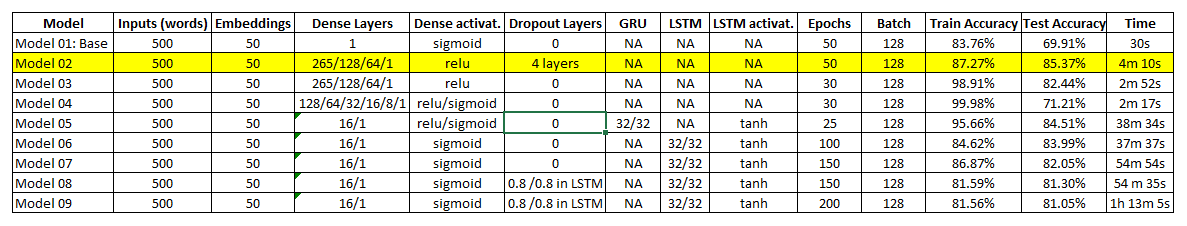

### Best Model
Dense Neural Network with 04 Dense Layers and four dropout layers (Model 02)

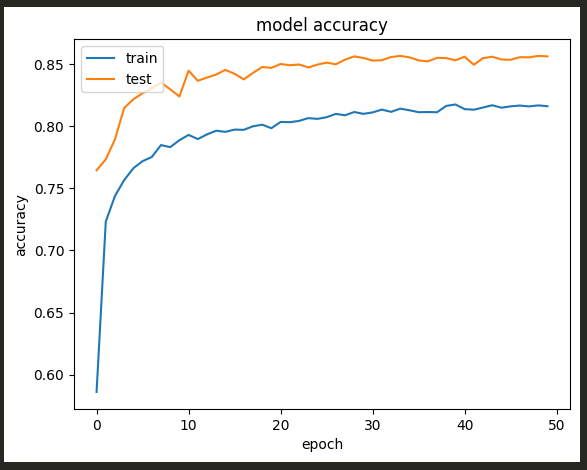

### Metric, Loss function and Optimizer Definition
To correctly define benchmark the different models, we defined accuracy as the primary metric to assess the performance of the sentiment analysis model.
We evaluate the accuracy of the training and testing datasets.
The loss function selected is binary cross entropy, and the optimizer is adaptive momentum (Adam)

### Model 01: Baseline model
A baseline model is the most straightforward approach that needs to be beaten by all the other approaches. From our previous experience, we found that a simple or naïve baseline model is sometimes very hard to beat by much more sophisticated approaches. In our case, we defined a vanilla neural network with only one dense layer, which receives as inputs a maximum of 500-word embeddings with 50 dimensions. We do not apply regularization, dropouts or any other technique to prevent overfitting, as we can see that the baseline model is highly biased with an accuracy of 69%. This model is so simple that runs in 39 seconds.

### Model 02: Pure dense layer
In this case, we work with five dense layers with 128, 64, 32, 16 and 1  neurons each. The input embeddings are similar to the baseline model. We also add 04 dropout layers to the sequence after each dense layer.
We obtained a significant performance improvement: 87.37% accuracy in the training dataset and 85.40% in the testing samples.

### Model 03: Pure Dense Layers without Dropout
The same dense model has been used without the dropout layers. The result was unsuccessful (we obtained a testing accuracy of 82.44%) as the model with dropout layers was superior. This means dropout layer really does its job.

### Model 04: Adding two addiitonal layers to the Dense Layer model (without Dropout)
In this opportunity, we add two Dense Layers to the model without Dropout layers. The resultant accuracy was 71.21%, which is pretty bad and comparable with the naive baseline model.   

### Model 05: GRU
We build a Gated Recurrent Unit (GRU) model to compete with the LSTM and Dense models. The GRU beat the LSTM but could not outperform the Dense Layer model. 

### Model 06: LSTM
This was the best of the LSTM models, with a testing accuracy of 84% and a training time of 37min. I did not use any regularization or any dropout hyperparameter. It could not beat the GRU or the dense neural network models.

### Model 07: LSTM 
We trained the model for more epochs (150 instead of 100) to improve its performance, as it was still not overfitting. However, we did not improve the original LSTM models with 100 epochs.

### Model 08: LSTM
We add a dropout hyperparameter of 0.8 in both LSTM layers (only 20% of the neurons are active each). This was to force all the neurons to be trained and reduce overfitting. Nevertheless, it could not beat the two previous LSTM models without dropout and with fewer epochs nor the GRU model.

### Model 09 LSTM
This is our more complex model with 200 epochs. It took 1 hour and 13 minutes to finish with the GPU, but unfortunately, it did not show any improvement in training or testing accuracy compared to the one with 150 epochs. 

### Conclusions
- Beating a vanilla neural network was not easy for much more advanced models. Even though the baseline was beaten by all of them, the second simplest model, another vanilla Neural Network, was unbeatable.
- Training and benchmarking LSTM and GRU can be time-consuming and GPU-intensive (a GPU was mandatory to perform this analysis). When running the models in a CPU, the training time for the LSTM models was more than 8 hours for the simplest one.
- In this sentiment analysis case, the Gated Recurrent Unit (GRU) was more effective than the  Long Short Term Memory (LSTM) models in terms of accuracy with similar training time. 
- Dropout Layers considerable improved the model tesing accuracy in case of the dense models. This model outperformed all of the LSTM and GRU more complex ones. 
- More hyperparameter tuning needs to be done inorder to properly take advantage of the GRU and LSTM models.
- Testing with other advanced configurations using transformers needs to be done to achieve even better resutls than with the Dense neural network.
- Additional testing could be done increaing the Embedding size and the vocabulary size during the prepprocessing.

### Below the details of our work...

### Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import re
import string
import nltk
from nltk.corpus import stopwords

In [2]:
from numpy import array
from keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Flatten
from tensorflow.python.keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer

In [4]:
import tensorflow as tf
print(tf.__version__)
print(tf.config.list_physical_devices('GPU'))

2.10.1
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [5]:
gpu_available = tf.test.is_gpu_available()
is_cuda_gpu_available = tf.test.is_gpu_available(cuda_only=True)
is_cuda_gpu_min_3 = tf.test.is_gpu_available(True, (3,0))

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


In [6]:
print(gpu_available)
print(is_cuda_gpu_available)
print(is_cuda_gpu_min_3) 

True
True
True


### Download the dataset from Kaggle
https://www.kaggle.com/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

### Data Exploration

In [7]:
movie_reviews = pd.read_csv('IMDB Dataset.csv')
movie_reviews.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [8]:
movie_reviews.isnull().values.any()

False

In [9]:
movie_reviews.shape

(50000, 2)

In [10]:
movie_reviews["review"][3]

"Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.<br /><br />OK, first of all when you're going to make a film you must Decide if its a thriller or a drama! As a drama the movie is watchable. Parents are divorcing & arguing like in real life. And then we have Jake with his closet which totally ruins all the film! I expected to see a BOOGEYMAN similar movie, and instead i watched a drama with some meaningless thriller spots.<br /><br />3 out of 10 just for the well playing parents & descent dialogs. As for the shots with Jake: just ignore them."

<AxesSubplot: xlabel='sentiment', ylabel='count'>

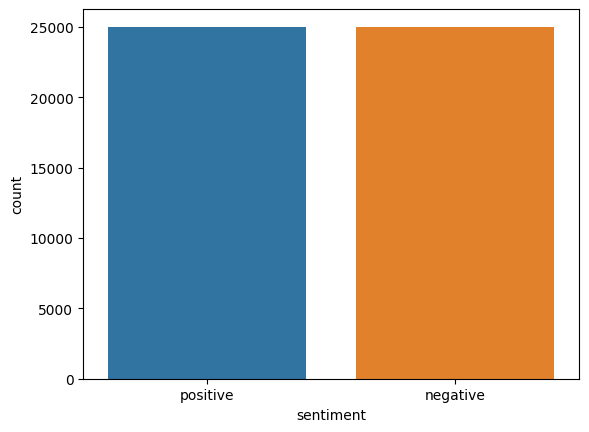

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.countplot(x='sentiment', data=movie_reviews)

### Pre-processing of text
- Removing html tags
- Removing punctutations and numbers
- Removing Multiple spaces
- so on

In [12]:
stop_words = stopwords.words('english') #English language's stop words

def textpreprocess(s):
    """This function cleans the text
    Input: string to be cleaned
    Return: string after cleaning
    """
    words = [] # empty list
    
    s = s.strip().lower() # lower the string
    s = re.sub('\[.*?\]', '', s) # removes symbols (.*?\)
    s = re.sub('https?://\S+|www\.\S+', '', s) # remove URLS
    s = re.sub('<.*?>+', '', s)
    s = re.sub('[%s]' % re.escape(string.punctuation), '', s) # remove punctuations
    s = re.sub('\n', '', s) # remove next line character
    s = re.sub('\w*\d\w*', '', s)
    
    words = s.split() # split the string into list of words
    words = [word for word in words if word not in stop_words] # removing stop words
    s = ' '.join(words) # converting list to string
    
    return s

In [13]:
%%time
X = []
sentences = list(movie_reviews['review'])
for sen in sentences:
    X.append(textpreprocess(sen))

CPU times: total: 18.5 s
Wall time: 18.5 s


In [14]:
X[3]

'basically theres family little boy jake thinks theres zombie closet parents fighting timethis movie slower soap opera suddenly jake decides become rambo kill zombieok first youre going make film must decide thriller drama drama movie watchable parents divorcing arguing like real life jake closet totally ruins film expected see boogeyman similar movie instead watched drama meaningless thriller well playing parents descent dialogs shots jake ignore'

### Creating numerical labels from categorical values

In [15]:
y = movie_reviews['sentiment']

y = np.array(list(map(lambda x: 1 if x=="positive" else 0, y)))

### Split the dataset to train and test

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [17]:
len(X_train)

40000

In [18]:
X_train

['thats kept asking many fights screaming matches swearing general mayhem permeate minutes comparisons also stand think onedimensional characters little depth virtually impossible care happens badly written cyphers director hang multicultural beliefs topic done much better dramas tv cinemai must confess im really one spotting bad performances film must said nichola burley heroines slutty best friend wasim zakir nasty bullying brother absolutely terrible dont know acting school graduated id apply full refund post haste samina awan lead role manages impress cast socalled british talent well probably never hear least thats hope next time hire different scoutanother intriguing thought hideously fashionable soundtrack featuring likes snow patrol ian brown keane im bit music fan im familiar artists output didnt recognise tracks movie apart omnipresent run bsides anyone get many many musical montages telegraph suppose feel accompanied startlingly original images couples kissing swollen lake c

### Use Tokenizer to integer encode the documents

In [19]:
# hyperparameters
num_words_ = 5000
oov_tok = "<OOV>"

tokenizer = Tokenizer(num_words=num_words_, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [20]:
X_train[0]

[85,
 644,
 1917,
 31,
 1745,
 1817,
 4080,
 1,
 682,
 4917,
 1,
 130,
 1,
 18,
 748,
 29,
 4017,
 28,
 40,
 1015,
 2138,
 1030,
 335,
 422,
 797,
 313,
 1,
 81,
 2877,
 1,
 4148,
 2748,
 124,
 13,
 45,
 2922,
 141,
 1,
 109,
 4682,
 56,
 10,
 4,
 1,
 17,
 246,
 3,
 109,
 191,
 1,
 1,
 1,
 1,
 39,
 328,
 1,
 1,
 1508,
 1,
 506,
 299,
 268,
 21,
 41,
 37,
 269,
 1,
 357,
 1,
 261,
 1,
 1890,
 1,
 1,
 1,
 345,
 119,
 851,
 3958,
 84,
 2913,
 557,
 498,
 14,
 135,
 35,
 689,
 116,
 85,
 307,
 255,
 9,
 3627,
 167,
 1,
 1524,
 95,
 1,
 1,
 598,
 1698,
 1016,
 2825,
 1,
 3566,
 1670,
 1,
 56,
 127,
 110,
 211,
 56,
 927,
 2433,
 1,
 60,
 1,
 3854,
 2,
 884,
 1,
 397,
 1,
 146,
 15,
 31,
 31,
 566,
 1,
 1,
 1176,
 128,
 4055,
 1,
 107,
 992,
 3434,
 1,
 1,
 2166,
 1,
 1,
 321,
 512,
 584,
 2704,
 1119,
 1,
 3306,
 81,
 1300,
 1065,
 1409,
 716,
 1090,
 202,
 2353,
 293,
 1,
 170,
 3325,
 841,
 1,
 1208,
 108,
 1,
 116,
 4,
 97,
 1368,
 979,
 4534,
 1,
 1,
 131,
 237,
 4378,
 3282,
 94,
 1,
 

In [21]:
tokenizer.word_index

{'<OOV>': 1,
 'movie': 2,
 'film': 3,
 'one': 4,
 'like': 5,
 'good': 6,
 'even': 7,
 'would': 8,
 'time': 9,
 'really': 10,
 'see': 11,
 'story': 12,
 'much': 13,
 'well': 14,
 'get': 15,
 'great': 16,
 'bad': 17,
 'also': 18,
 'people': 19,
 'first': 20,
 'dont': 21,
 'movies': 22,
 'made': 23,
 'could': 24,
 'make': 25,
 'films': 26,
 'way': 27,
 'characters': 28,
 'think': 29,
 'watch': 30,
 'many': 31,
 'seen': 32,
 'character': 33,
 'two': 34,
 'never': 35,
 'love': 36,
 'acting': 37,
 'plot': 38,
 'best': 39,
 'little': 40,
 'know': 41,
 'show': 42,
 'ever': 43,
 'life': 44,
 'better': 45,
 'scene': 46,
 'end': 47,
 'say': 48,
 'still': 49,
 'man': 50,
 'scenes': 51,
 'something': 52,
 'go': 53,
 'back': 54,
 'real': 55,
 'im': 56,
 'watching': 57,
 'thing': 58,
 'doesnt': 59,
 'didnt': 60,
 'actors': 61,
 'years': 62,
 'actually': 63,
 'though': 64,
 'makes': 65,
 'funny': 66,
 'find': 67,
 'going': 68,
 'nothing': 69,
 'another': 70,
 'look': 71,
 'lot': 72,
 'new': 73,
 'work

### Pad Sequences to create equal-length inputs

In [22]:
vocab_size = len(tokenizer.word_index) + 1

maxlen = 500
trunc_type='post'
padding_type='post'

X_train = pad_sequences(X_train, maxlen=maxlen, truncating= trunc_type, padding=padding_type)
X_test = pad_sequences(X_test, padding=padding_type, maxlen=maxlen, truncating= trunc_type)

### Load GloVe embedding into memory

### GloVe Embeddings
- glove.6B.50d.txt (` 175 MB)
https://www.kaggle.com/datasets/watts2/glove6b50dtxt

In [23]:
from numpy import array
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()
glove_file = open('glove.6B.50d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

In [24]:
embeddings_dictionary

{'the': array([ 4.1800e-01,  2.4968e-01, -4.1242e-01,  1.2170e-01,  3.4527e-01,
        -4.4457e-02, -4.9688e-01, -1.7862e-01, -6.6023e-04, -6.5660e-01,
         2.7843e-01, -1.4767e-01, -5.5677e-01,  1.4658e-01, -9.5095e-03,
         1.1658e-02,  1.0204e-01, -1.2792e-01, -8.4430e-01, -1.2181e-01,
        -1.6801e-02, -3.3279e-01, -1.5520e-01, -2.3131e-01, -1.9181e-01,
        -1.8823e+00, -7.6746e-01,  9.9051e-02, -4.2125e-01, -1.9526e-01,
         4.0071e+00, -1.8594e-01, -5.2287e-01, -3.1681e-01,  5.9213e-04,
         7.4449e-03,  1.7778e-01, -1.5897e-01,  1.2041e-02, -5.4223e-02,
        -2.9871e-01, -1.5749e-01, -3.4758e-01, -4.5637e-02, -4.4251e-01,
         1.8785e-01,  2.7849e-03, -1.8411e-01, -1.1514e-01, -7.8581e-01],
       dtype=float32),
 ',': array([ 0.013441,  0.23682 , -0.16899 ,  0.40951 ,  0.63812 ,  0.47709 ,
        -0.42852 , -0.55641 , -0.364   , -0.23938 ,  0.13001 , -0.063734,
        -0.39575 , -0.48162 ,  0.23291 ,  0.090201, -0.13324 ,  0.078639,
        -0.4

### Create Embedding matrix for our Kaggle dataset

In [25]:
embedding_matrix = zeros((vocab_size, 50))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

### Model 01: Build the Baseline Model - Basic Neural Network 

In [26]:
model = Sequential()
embedding_layer = Embedding(vocab_size, 
                            50, 
                            weights=[embedding_matrix], 
                            input_length=maxlen , 
                            trainable=False)
model.add(embedding_layer)
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

### Compile the model

In [27]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['acc'])
# print(model.summary())

### Fit the model

In [28]:
%%time
history = model.fit(X_train, 
                    y_train, 
                    batch_size=128, 
                    epochs=50, 
                    verbose=1, 
                    validation_split=0.2)

Epoch 1/50
250/250 [==============================] - 1s 3ms/step - loss: 0.5801 - acc: 0.7013 - val_loss: 0.5377 - val_acc: 0.7394
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 0.4719 - acc: 0.7764 - val_loss: 0.5532 - val_acc: 0.7316
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 0.4361 - acc: 0.7970 - val_loss: 0.5597 - val_acc: 0.7331
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 0.4136 - acc: 0.8098 - val_loss: 0.5726 - val_acc: 0.7330
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 0.4007 - acc: 0.8157 - val_loss: 0.5838 - val_acc: 0.7278
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 0.3895 - acc: 0.8216 - val_loss: 0.5976 - val_acc: 0.7270
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 0.3782 - acc: 0.8273 - val_loss: 0.6165 - val_acc: 0.7283
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 0.

In [29]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 module_wrapper (ModuleWrapp  (None, 500, 50)          9309450   
 er)                                                             
                                                                 
 flatten (Flatten)           (None, 25000)             0         
                                                                 
 dense (Dense)               (None, 1)                 25001     
                                                                 
Total params: 9,334,451
Trainable params: 25,001
Non-trainable params: 9,309,450
_________________________________________________________________
None


### Evaluate Training phase

In [30]:
score = model.evaluate(X_train, y_train, verbose=1)
score

1250/1250 [==============================] - 2s 2ms/step - loss: 0.4506 - acc: 0.8377


[0.4505900740623474, 0.8376500010490417]

In [31]:
print("Train Loss:", score[0])
print("Train Accuracy:", score[1])

Train Loss: 0.4505900740623474
Train Accuracy: 0.8376500010490417


### Evaluate Testing phase

In [32]:
score = model.evaluate(X_test, y_test, verbose=1)
score

313/313 [==============================] - 1s 2ms/step - loss: 1.1329 - acc: 0.6992


[1.1329256296157837, 0.6991999745368958]

In [33]:
print("Test Loss:", score[0])
print("Test Accuracy:", score[1])

Test Loss: 1.1329256296157837
Test Accuracy: 0.6991999745368958


### Plot the training and testing accuracy and loss

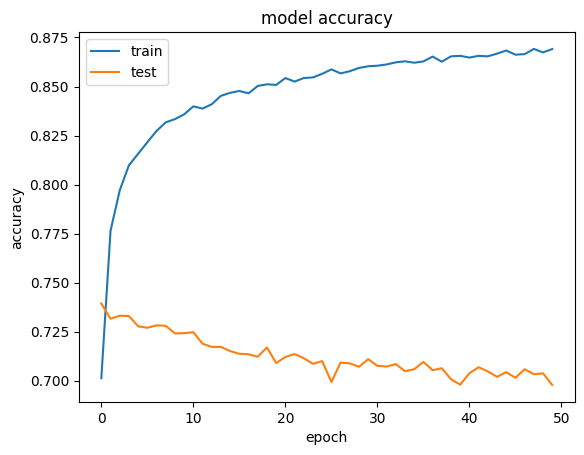

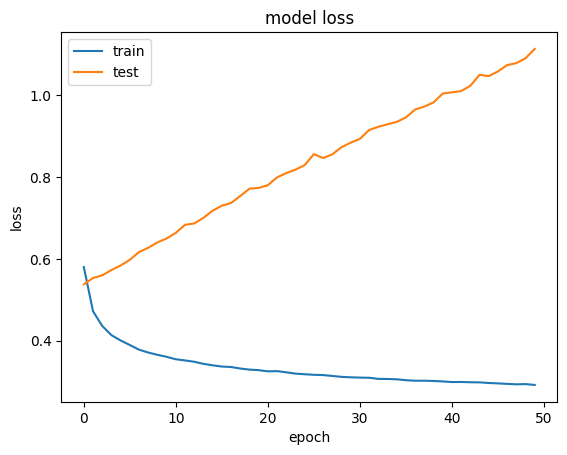

In [34]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

### Model 02: Four Dense Layers + Two Dropout Layers

high variance

In [35]:
from tensorflow.keras.layers import Dropout

In [36]:
model = Sequential()
embedding_layer = Embedding(vocab_size, 
                            50, 
                            weights=[embedding_matrix], 
                            input_length=maxlen , 
                            trainable=False)
model.add(embedding_layer)
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

# print(model.summary())

In [37]:
%%time
history = model.fit(X_train, y_train, batch_size=128, epochs=50, verbose=1, validation_split=0.2)

Epoch 1/50
250/250 [==============================] - 6s 20ms/step - loss: 0.6653 - acc: 0.5861 - val_loss: 0.5436 - val_acc: 0.7645
Epoch 2/50
250/250 [==============================] - 5s 19ms/step - loss: 0.5519 - acc: 0.7232 - val_loss: 0.5022 - val_acc: 0.7732
Epoch 3/50
250/250 [==============================] - 5s 19ms/step - loss: 0.5213 - acc: 0.7438 - val_loss: 0.4722 - val_acc: 0.7894
Epoch 4/50
250/250 [==============================] - 5s 19ms/step - loss: 0.5059 - acc: 0.7566 - val_loss: 0.4398 - val_acc: 0.8146
Epoch 5/50
250/250 [==============================] - 5s 19ms/step - loss: 0.4945 - acc: 0.7661 - val_loss: 0.4197 - val_acc: 0.8216
Epoch 6/50
250/250 [==============================] - 5s 20ms/step - loss: 0.4861 - acc: 0.7718 - val_loss: 0.4127 - val_acc: 0.8265
Epoch 7/50
250/250 [==============================] - 5s 19ms/step - loss: 0.4785 - acc: 0.7752 - val_loss: 0.4050 - val_acc: 0.8304
Epoch 8/50
250/250 [==============================] - 5s 19ms/step - 

In [38]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 module_wrapper_1 (ModuleWra  (None, 500, 50)          9309450   
 pper)                                                           
                                                                 
 dropout (Dropout)           (None, 500, 50)           0         
                                                                 
 dense_1 (Dense)             (None, 500, 256)          13056     
                                                                 
 dropout_1 (Dropout)         (None, 500, 256)          0         
                                                                 
 dense_2 (Dense)             (None, 500, 128)          32896     
                                                                 
 dropout_2 (Dropout)         (None, 500, 128)          0         
                                                      

### Evaluate Training phase

In [39]:
score = model.evaluate(X_train, y_train, verbose=1)
score

1250/1250 [==============================] - 5s 4ms/step - loss: 0.3200 - acc: 0.8728


[0.3200356364250183, 0.8727750182151794]

In [40]:
print("Train Loss:", score[0])
print("Train Accuracy:", score[1])

Train Loss: 0.3200356364250183
Train Accuracy: 0.8727750182151794


### Evaluate Testing phase

In [41]:
score = model.evaluate(X_test, y_test, verbose=1)
score

313/313 [==============================] - 1s 4ms/step - loss: 0.3504 - acc: 0.8537


[0.3504055142402649, 0.8536999821662903]

In [42]:
print("Test Loss:", score[0])
print("Test Accuracy:", score[1])

Test Loss: 0.3504055142402649
Test Accuracy: 0.8536999821662903


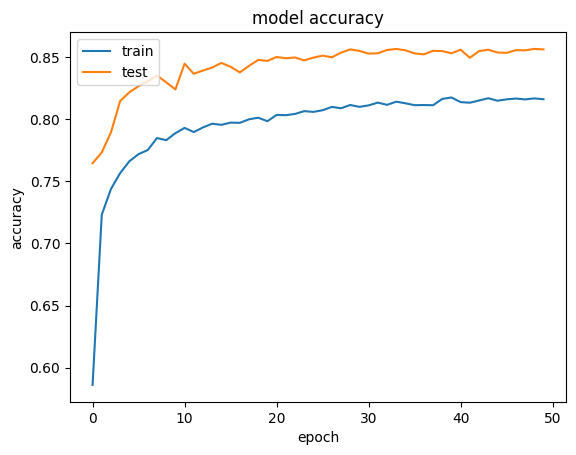

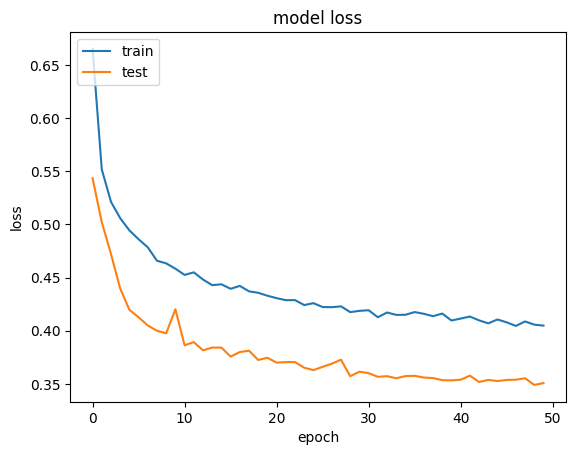

In [43]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

### Model 03:  Four Dense Layers without dropout

In [44]:
model = Sequential()
embedding_layer = Embedding(vocab_size, 50, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model.add(embedding_layer)
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

### Compile the model

In [45]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['acc']
             )

# print(model.summary())

### Fit the model

In [46]:
%%time
history = model.fit(X_train, 
                    y_train, 
                    batch_size=32, 
                    epochs=30, 
                    verbose=1, 
                    validation_data=(X_test, y_test))

Epoch 1/30
1250/1250 [==============================] - 6s 5ms/step - loss: 0.4289 - acc: 0.8008 - val_loss: 0.3449 - val_acc: 0.8526
Epoch 2/30
1250/1250 [==============================] - 6s 4ms/step - loss: 0.3298 - acc: 0.8597 - val_loss: 0.3293 - val_acc: 0.8601
Epoch 3/30
1250/1250 [==============================] - 5s 4ms/step - loss: 0.2899 - acc: 0.8790 - val_loss: 0.3600 - val_acc: 0.8464
Epoch 4/30
1250/1250 [==============================] - 6s 5ms/step - loss: 0.2545 - acc: 0.8950 - val_loss: 0.3565 - val_acc: 0.8511
Epoch 5/30
1250/1250 [==============================] - 5s 4ms/step - loss: 0.2217 - acc: 0.9087 - val_loss: 0.3867 - val_acc: 0.8437
Epoch 6/30
1250/1250 [==============================] - 5s 4ms/step - loss: 0.1931 - acc: 0.9214 - val_loss: 0.4029 - val_acc: 0.8448
Epoch 7/30
1250/1250 [==============================] - 6s 5ms/step - loss: 0.1694 - acc: 0.9326 - val_loss: 0.4425 - val_acc: 0.8453
Epoch 8/30
1250/1250 [==============================] - 5s 4ms

In [47]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 module_wrapper_2 (ModuleWra  (None, 500, 50)          9309450   
 pper)                                                           
                                                                 
 dense_5 (Dense)             (None, 500, 256)          13056     
                                                                 
 dense_6 (Dense)             (None, 500, 128)          32896     
                                                                 
 dense_7 (Dense)             (None, 500, 64)           8256      
                                                                 
 flatten_2 (Flatten)         (None, 32000)             0         
                                                                 
 dense_8 (Dense)             (None, 1)                 32001     
                                                      

### Evaluate Training phase

In [48]:
score = model.evaluate(X_train, y_train, verbose=1)
score

1250/1250 [==============================] - 5s 4ms/step - loss: 0.0316 - acc: 0.9891


[0.031558260321617126, 0.9890750050544739]

In [49]:
print("Train Loss:", score[0])
print("Train Accuracy:", score[1])

Train Loss: 0.031558260321617126
Train Accuracy: 0.9890750050544739


### Evaluate Testing phase

In [50]:
score = model.evaluate(X_test, y_test, verbose=1)
score

313/313 [==============================] - 1s 4ms/step - loss: 1.6921 - acc: 0.8244


[1.6920628547668457, 0.824400007724762]

In [51]:
print("Test Loss:", score[0])
print("Test Accuracy:", score[1])

Test Loss: 1.6920628547668457
Test Accuracy: 0.824400007724762


### Plot the training and testing accuracy and loss

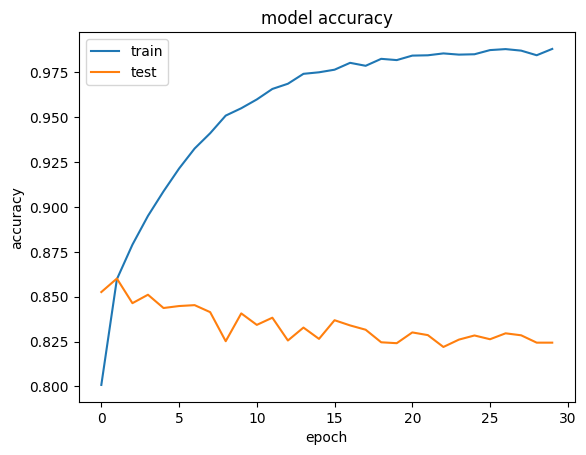

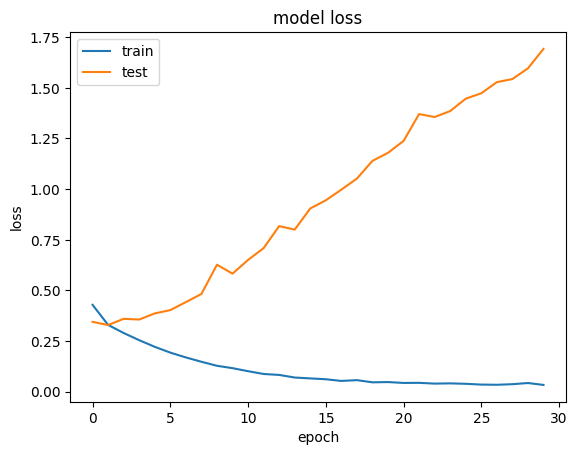

In [52]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

### Model 04: Dense Neural Network with more layers

In [53]:
model = Sequential()
embedding_layer = Embedding(vocab_size, 
                            50, 
                            weights=[embedding_matrix], 
                            input_length=maxlen , 
                            trainable=False)
model.add(embedding_layer)
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

### Compile the model

In [55]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001), 
              loss='binary_crossentropy', 
              metrics=['acc']
             )

# print(model.summary())

### Fit the model

In [56]:
%%time
history = model.fit(X_train, 
                    y_train, 
                    batch_size=32, 
                    epochs=30, 
                    verbose=1, 
                    validation_data=(X_test, y_test))

Epoch 1/30
1250/1250 [==============================] - 6s 4ms/step - loss: 0.6720 - acc: 0.5737 - val_loss: 0.6497 - val_acc: 0.6678
Epoch 2/30
1250/1250 [==============================] - 4s 4ms/step - loss: 0.5971 - acc: 0.6988 - val_loss: 0.5868 - val_acc: 0.7154
Epoch 3/30
1250/1250 [==============================] - 5s 4ms/step - loss: 0.5078 - acc: 0.7644 - val_loss: 0.5582 - val_acc: 0.7282
Epoch 4/30
1250/1250 [==============================] - 5s 4ms/step - loss: 0.4520 - acc: 0.7990 - val_loss: 0.5561 - val_acc: 0.7313
Epoch 5/30
1250/1250 [==============================] - 5s 4ms/step - loss: 0.4132 - acc: 0.8216 - val_loss: 0.5602 - val_acc: 0.7343
Epoch 6/30
1250/1250 [==============================] - 5s 4ms/step - loss: 0.3804 - acc: 0.8405 - val_loss: 0.5792 - val_acc: 0.7335
Epoch 7/30
1250/1250 [==============================] - 5s 4ms/step - loss: 0.3507 - acc: 0.8562 - val_loss: 0.5979 - val_acc: 0.7291
Epoch 8/30
1250/1250 [==============================] - 4s 4ms

In [57]:
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 module_wrapper_3 (ModuleWra  (None, 500, 50)          9309450   
 pper)                                                           
                                                                 
 flatten_3 (Flatten)         (None, 25000)             0         
                                                                 
 dense_9 (Dense)             (None, 128)               3200128   
                                                                 
 dense_10 (Dense)            (None, 64)                8256      
                                                                 
 dense_11 (Dense)            (None, 32)                2080      
                                                                 
 dense_12 (Dense)            (None, 16)                528       
                                                      

### Evaluate Training phase

In [58]:
score = model.evaluate(X_train, y_train, verbose=1)
score

1250/1250 [==============================] - 3s 2ms/step - loss: 0.0015 - acc: 0.9999


[0.0015003059525042772, 0.999875009059906]

In [59]:
print("Train Loss:", score[0])
print("Train Accuracy:", score[1])

Train Loss: 0.0015003059525042772
Train Accuracy: 0.999875009059906


### Evaluate Testing phase

In [60]:
score = model.evaluate(X_test, y_test, verbose=1)
score

313/313 [==============================] - 1s 2ms/step - loss: 2.2285 - acc: 0.7122


[2.22851300239563, 0.7121999859809875]

In [61]:
print("Test Loss:", score[0])
print("Test Accuracy:", score[1])

Test Loss: 2.22851300239563
Test Accuracy: 0.7121999859809875


### Plot the training and testing accuracy and loss

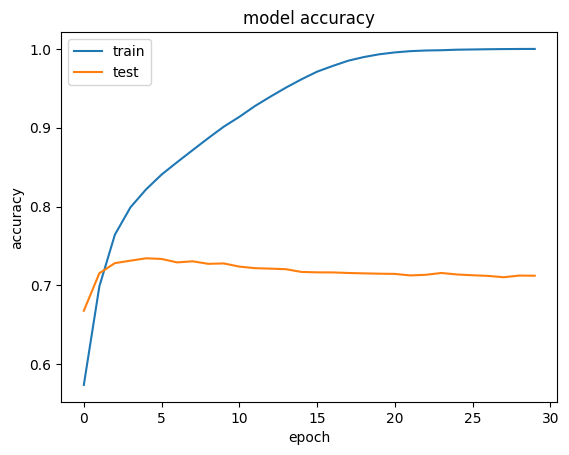

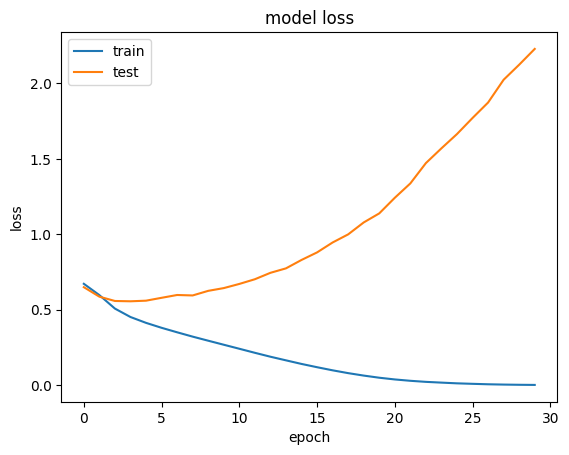

In [62]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

### Model 05: Build a GRU model

In [63]:
from tensorflow.keras.layers import GRU

In [64]:
model = Sequential()
embedding_layer = Embedding(vocab_size, 50, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model.add(embedding_layer)
model.add(GRU(32,  return_sequences=True))
model.add(GRU(32))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [65]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [66]:
%%time
history = model.fit(X_train, y_train, batch_size=128, epochs=100, verbose=1, validation_data=(X_test, y_test))

Epoch 1/100
313/313 [==============================] - 26s 74ms/step - loss: 0.6931 - accuracy: 0.4991 - val_loss: 0.6930 - val_accuracy: 0.5040
Epoch 2/100
313/313 [==============================] - 22s 71ms/step - loss: 0.6930 - accuracy: 0.5002 - val_loss: 0.6932 - val_accuracy: 0.4971
Epoch 3/100
313/313 [==============================] - 22s 71ms/step - loss: 0.6929 - accuracy: 0.5028 - val_loss: 0.6938 - val_accuracy: 0.5041
Epoch 4/100
313/313 [==============================] - 23s 73ms/step - loss: 0.6924 - accuracy: 0.5016 - val_loss: 0.6931 - val_accuracy: 0.4974
Epoch 5/100
313/313 [==============================] - 30s 95ms/step - loss: 0.6918 - accuracy: 0.5001 - val_loss: 0.6934 - val_accuracy: 0.5040
Epoch 6/100
313/313 [==============================] - 23s 73ms/step - loss: 0.6913 - accuracy: 0.5018 - val_loss: 0.6941 - val_accuracy: 0.4973
Epoch 7/100
313/313 [==============================] - 23s 73ms/step - loss: 0.6905 - accuracy: 0.5033 - val_loss: 0.6952 - val_ac

### Evaluate Training phase

In [67]:
score = model.evaluate(X_train, y_train, verbose=1)
score

1250/1250 [==============================] - 35s 28ms/step - loss: 0.1300 - accuracy: 0.9566


[0.12995971739292145, 0.9565500020980835]

In [68]:
print("Train Loss:", score[0])
print("Train Accuracy:", score[1])

Train Loss: 0.12995971739292145
Train Accuracy: 0.9565500020980835


### Evaluate Testing phase

In [69]:
score = model.evaluate(X_test, y_test, verbose=1)

313/313 [==============================] - 9s 27ms/step - loss: 0.4951 - accuracy: 0.8451


In [70]:
print("Test Loss:", score[0])
print("Test Accuracy:", score[1])

Test Loss: 0.49510931968688965
Test Accuracy: 0.8450999855995178


### Plot the training and testing accuracy and loss

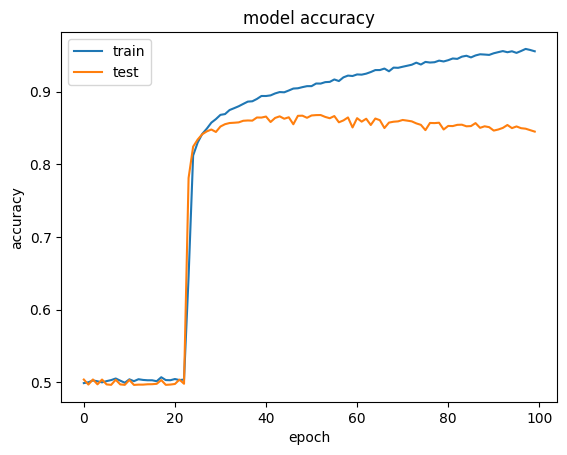

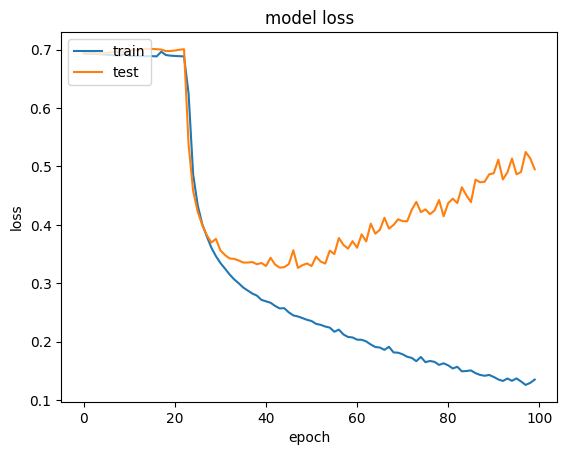

In [71]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [72]:
from tensorflow.keras.layers import LSTM

### Model 06: Long Short Term Memory (LSTM) Neural Network

In [296]:
model = Sequential()
embedding_layer = Embedding(vocab_size, 50, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model.add(embedding_layer)
model.add(LSTM(32, activation='tanh', return_sequences=True))
model.add(LSTM(32, activation='tanh'))
model.add(Dense(16, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

### Compile the model

In [297]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

### Fit the model

In [298]:
%%time
history = model.fit(X_train, y_train, batch_size=128, epochs=100, verbose=1, validation_data=(X_test, y_test))

Epoch 1/100
313/313 [==============================] - 26s 75ms/step - loss: 0.6939 - accuracy: 0.5039 - val_loss: 0.6931 - val_accuracy: 0.4995
Epoch 2/100
313/313 [==============================] - 21s 69ms/step - loss: 0.6739 - accuracy: 0.5651 - val_loss: 0.6816 - val_accuracy: 0.5361
Epoch 3/100
313/313 [==============================] - 22s 69ms/step - loss: 0.6745 - accuracy: 0.5640 - val_loss: 0.6746 - val_accuracy: 0.5705
Epoch 4/100
313/313 [==============================] - 21s 68ms/step - loss: 0.6683 - accuracy: 0.5995 - val_loss: 0.6783 - val_accuracy: 0.5478
Epoch 5/100
313/313 [==============================] - 21s 67ms/step - loss: 0.6647 - accuracy: 0.6036 - val_loss: 0.6609 - val_accuracy: 0.6238
Epoch 6/100
313/313 [==============================] - 23s 72ms/step - loss: 0.6908 - accuracy: 0.5142 - val_loss: 0.6930 - val_accuracy: 0.5039
Epoch 7/100
313/313 [==============================] - 23s 72ms/step - loss: 0.6933 - accuracy: 0.4992 - val_loss: 0.6934 - val_ac

In [299]:
print(model.summary())

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 module_wrapper_15 (ModuleWr  (None, 500, 50)          9309450   
 apper)                                                          
                                                                 
 lstm_8 (LSTM)               (None, 500, 32)           10624     
                                                                 
 lstm_9 (LSTM)               (None, 32)                8320      
                                                                 
 dense_28 (Dense)            (None, 16)                528       
                                                                 
 dense_29 (Dense)            (None, 1)                 17        
                                                                 
Total params: 9,328,939
Trainable params: 19,489
Non-trainable params: 9,309,450
______________________________________

### Evaluate Training phase

In [300]:
score = model.evaluate(X_train, y_train, verbose=1)
score

1250/1250 [==============================] - 35s 28ms/step - loss: 0.3629 - accuracy: 0.8463


[0.3628646731376648, 0.8462749719619751]

In [301]:
print("Train Loss:", score[0])
print("Train Accuracy:", score[1])

Train Loss: 0.3628646731376648
Train Accuracy: 0.8462749719619751


### Evaluate Testing phase

In [302]:
score = model.evaluate(X_test, y_test, verbose=1)

313/313 [==============================] - 9s 28ms/step - loss: 0.3802 - accuracy: 0.8399


In [303]:
print("Test Loss:", score[0])
print("Test Accuracy:", score[1])

Test Loss: 0.3801719546318054
Test Accuracy: 0.839900016784668


### Plot the training and testing accuracy and loss

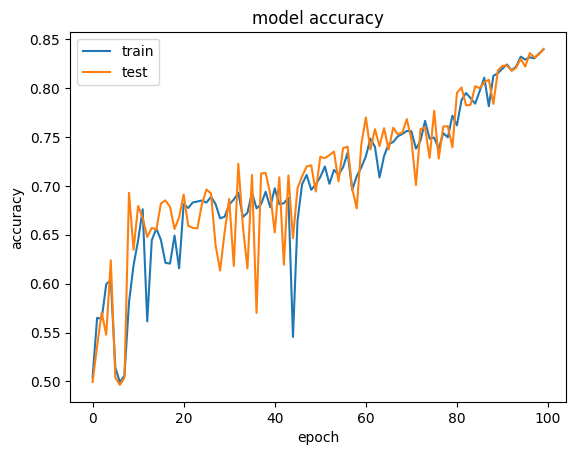

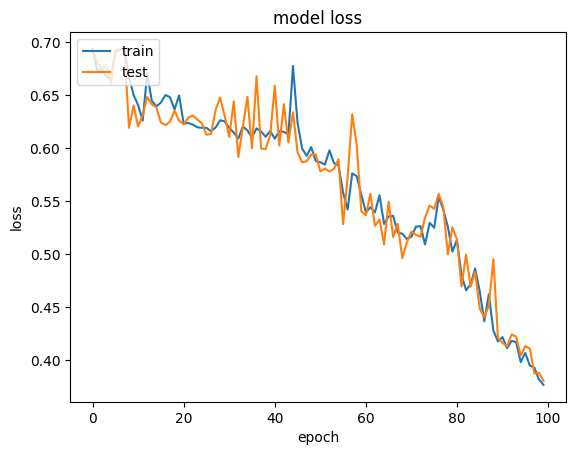

In [304]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

### Model 07: Long Short Term Memory Neural Network with more epochs

In [305]:
model = Sequential()
embedding_layer = Embedding(vocab_size, 50, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model.add(embedding_layer)
model.add(LSTM(32, activation='tanh', return_sequences=True))
model.add(LSTM(32, activation='tanh'))
model.add(Dense(16, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

### Compile the model

In [306]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

### Fit the Model

In [307]:
%%time
history = model.fit(X_train, 
                    y_train, 
                    batch_size=128, 
                    epochs=150, 
                    verbose=1, 
                    validation_data=(X_test, y_test))

Epoch 1/150
313/313 [==============================] - 26s 74ms/step - loss: 0.6933 - accuracy: 0.4998 - val_loss: 0.6937 - val_accuracy: 0.4972
Epoch 2/150
313/313 [==============================] - 22s 70ms/step - loss: 0.6931 - accuracy: 0.5021 - val_loss: 0.6934 - val_accuracy: 0.4975
Epoch 3/150
313/313 [==============================] - 22s 71ms/step - loss: 0.6930 - accuracy: 0.4974 - val_loss: 0.6930 - val_accuracy: 0.4986
Epoch 4/150
313/313 [==============================] - 21s 68ms/step - loss: 0.6765 - accuracy: 0.5531 - val_loss: 0.6325 - val_accuracy: 0.6741
Epoch 5/150
313/313 [==============================] - 22s 71ms/step - loss: 0.6396 - accuracy: 0.6590 - val_loss: 0.6414 - val_accuracy: 0.6419
Epoch 6/150
313/313 [==============================] - 22s 70ms/step - loss: 0.6370 - accuracy: 0.6623 - val_loss: 0.6370 - val_accuracy: 0.6568
Epoch 7/150
313/313 [==============================] - 22s 70ms/step - loss: 0.6338 - accuracy: 0.6640 - val_loss: 0.6268 - val_ac

In [308]:
print(model.summary())

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 module_wrapper_16 (ModuleWr  (None, 500, 50)          9309450   
 apper)                                                          
                                                                 
 lstm_10 (LSTM)              (None, 500, 32)           10624     
                                                                 
 lstm_11 (LSTM)              (None, 32)                8320      
                                                                 
 dense_30 (Dense)            (None, 16)                528       
                                                                 
 dense_31 (Dense)            (None, 1)                 17        
                                                                 
Total params: 9,328,939
Trainable params: 19,489
Non-trainable params: 9,309,450
______________________________________

### Evaluate Training phase

In [309]:
score = model.evaluate(X_train, y_train, verbose=1)
score

1250/1250 [==============================] - 33s 26ms/step - loss: 0.2757 - accuracy: 0.8688


[0.27569273114204407, 0.8687750101089478]

In [310]:
print("Train Loss:", score[0])
print("Train Accuracy:", score[1])

Train Loss: 0.27569273114204407
Train Accuracy: 0.8687750101089478


### Evaluate Testing phase

In [311]:
score = model.evaluate(X_test, y_test, verbose=1)

313/313 [==============================] - 8s 26ms/step - loss: 0.4021 - accuracy: 0.8205


In [312]:
print("Test Loss:", score[0])
print("Test Accuracy:", score[1])

Test Loss: 0.4021351635456085
Test Accuracy: 0.8205000162124634


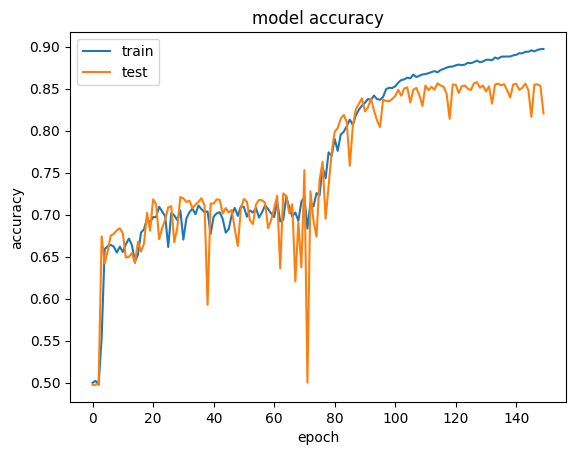

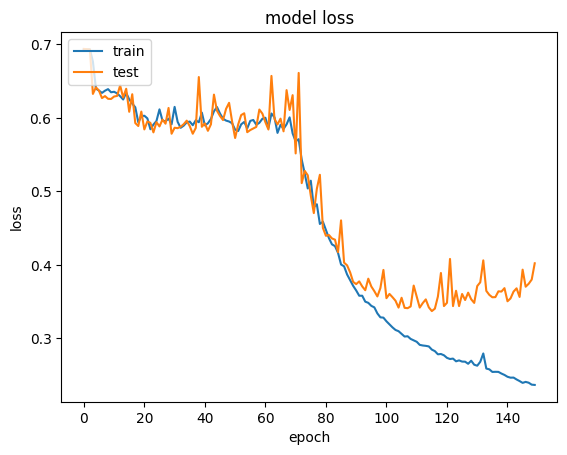

In [313]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

### Model 08: Long Short Term Memory Neural Network with Dropout in the two LSTM layers

In [314]:
model = Sequential()
embedding_layer = Embedding(vocab_size, 
                            50, 
                            weights=[embedding_matrix], 
                            input_length=maxlen , 
                            trainable=False)
model.add(embedding_layer)
model.add(LSTM(32, 
               activation='tanh', 
               return_sequences=True,
               dropout=0.8))
model.add(LSTM(32, 
               activation='tanh',
               dropout=0.8))
model.add(Dense(16, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

In [315]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [316]:
%%time
history = model.fit(X_train, 
                    y_train, 
                    batch_size=128, 
                    epochs=150, 
                    verbose=1, 
                    validation_data=(X_test, y_test))

Epoch 1/150
313/313 [==============================] - 24s 70ms/step - loss: 0.6975 - accuracy: 0.5017 - val_loss: 0.6937 - val_accuracy: 0.4961
Epoch 2/150
313/313 [==============================] - 23s 73ms/step - loss: 0.6937 - accuracy: 0.4940 - val_loss: 0.6934 - val_accuracy: 0.5039
Epoch 3/150
313/313 [==============================] - 22s 70ms/step - loss: 0.6935 - accuracy: 0.5023 - val_loss: 0.6932 - val_accuracy: 0.4971
Epoch 4/150
313/313 [==============================] - 22s 70ms/step - loss: 0.6935 - accuracy: 0.5012 - val_loss: 0.6931 - val_accuracy: 0.5039
Epoch 5/150
313/313 [==============================] - 21s 68ms/step - loss: 0.6935 - accuracy: 0.5003 - val_loss: 0.6938 - val_accuracy: 0.4972
Epoch 6/150
313/313 [==============================] - 21s 68ms/step - loss: 0.6934 - accuracy: 0.5015 - val_loss: 0.6930 - val_accuracy: 0.5040
Epoch 7/150
313/313 [==============================] - 22s 69ms/step - loss: 0.6936 - accuracy: 0.4933 - val_loss: 0.6936 - val_ac

In [317]:
print(model.summary())

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 module_wrapper_17 (ModuleWr  (None, 500, 50)          9309450   
 apper)                                                          
                                                                 
 lstm_12 (LSTM)              (None, 500, 32)           10624     
                                                                 
 lstm_13 (LSTM)              (None, 32)                8320      
                                                                 
 dense_32 (Dense)            (None, 16)                528       
                                                                 
 dense_33 (Dense)            (None, 1)                 17        
                                                                 
Total params: 9,328,939
Trainable params: 19,489
Non-trainable params: 9,309,450
______________________________________

### Evaluate Training phase

In [318]:
score = model.evaluate(X_train, y_train, verbose=1)
score

1250/1250 [==============================] - 33s 27ms/step - loss: 0.4118 - accuracy: 0.8160


[0.4118306040763855, 0.8159999847412109]

In [319]:
print("Train Loss:", score[0])
print("Train Accuracy:", score[1])

Train Loss: 0.4118306040763855
Train Accuracy: 0.8159999847412109


### Evaluate Testing phase

In [320]:
score = model.evaluate(X_test, y_test, verbose=1)

313/313 [==============================] - 8s 26ms/step - loss: 0.4158 - accuracy: 0.8130


In [321]:
print("Test Loss:", score[0])
print("Test Accuracy:", score[1])

Test Loss: 0.4158443212509155
Test Accuracy: 0.8130000233650208


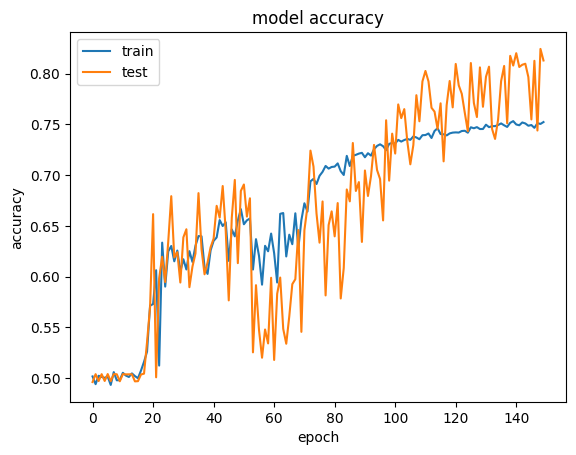

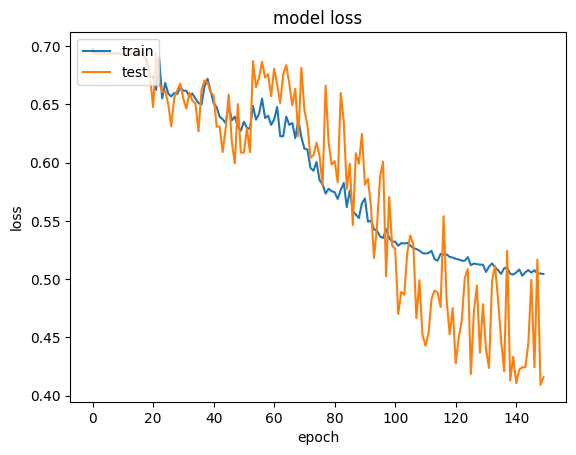

In [322]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

### Model 09: LSTM Neural Network with dropout in the two LSTM Layers and 200 epochs

In [323]:
model = Sequential()
embedding_layer = Embedding(vocab_size, 
                            50, 
                            weights=[embedding_matrix], 
                            input_length=maxlen , 
                            trainable=False)
model.add(embedding_layer)
model.add(LSTM(32, 
               activation='tanh', 
               return_sequences=True,
               dropout=0.8))
model.add(LSTM(32, 
               activation='tanh',
               dropout=0.8))
model.add(Dense(16, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

In [324]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [325]:
%%time
history = model.fit(X_train, 
                    y_train, 
                    batch_size=128, 
                    epochs=200, 
                    verbose=1, 
                    validation_data=(X_test, y_test))

Epoch 1/200
313/313 [==============================] - 25s 70ms/step - loss: 0.6942 - accuracy: 0.5013 - val_loss: 0.6931 - val_accuracy: 0.4980
Epoch 2/200
313/313 [==============================] - 21s 66ms/step - loss: 0.6934 - accuracy: 0.4997 - val_loss: 0.6930 - val_accuracy: 0.5039
Epoch 3/200
313/313 [==============================] - 23s 73ms/step - loss: 0.6933 - accuracy: 0.5019 - val_loss: 0.6930 - val_accuracy: 0.4986
Epoch 4/200
313/313 [==============================] - 22s 70ms/step - loss: 0.6906 - accuracy: 0.5207 - val_loss: 0.6545 - val_accuracy: 0.6759
Epoch 5/200
313/313 [==============================] - 22s 70ms/step - loss: 0.6784 - accuracy: 0.5840 - val_loss: 0.6734 - val_accuracy: 0.6031
Epoch 6/200
313/313 [==============================] - 22s 71ms/step - loss: 0.6779 - accuracy: 0.5759 - val_loss: 0.6620 - val_accuracy: 0.6072
Epoch 7/200
313/313 [==============================] - 21s 68ms/step - loss: 0.6719 - accuracy: 0.5954 - val_loss: 0.6390 - val_ac

In [326]:
print(model.summary())

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 module_wrapper_18 (ModuleWr  (None, 500, 50)          9309450   
 apper)                                                          
                                                                 
 lstm_14 (LSTM)              (None, 500, 32)           10624     
                                                                 
 lstm_15 (LSTM)              (None, 32)                8320      
                                                                 
 dense_34 (Dense)            (None, 16)                528       
                                                                 
 dense_35 (Dense)            (None, 1)                 17        
                                                                 
Total params: 9,328,939
Trainable params: 19,489
Non-trainable params: 9,309,450
______________________________________

### Evaluate Training phase

In [327]:
score = model.evaluate(X_train, y_train, verbose=1)
score

1250/1250 [==============================] - 34s 27ms/step - loss: 0.4190 - accuracy: 0.8156


[0.4189704656600952, 0.8155999779701233]

In [328]:
print("Train Loss:", score[0])
print("Train Accuracy:", score[1])

Train Loss: 0.4189704656600952
Train Accuracy: 0.8155999779701233


### Evaluate Testing phase

In [329]:
score = model.evaluate(X_test, y_test, verbose=1)

313/313 [==============================] - 8s 26ms/step - loss: 0.4231 - accuracy: 0.8106


In [330]:
print("Test Loss:", score[0])
print("Test Accuracy:", score[1])

Test Loss: 0.4230899512767792
Test Accuracy: 0.8105999827384949


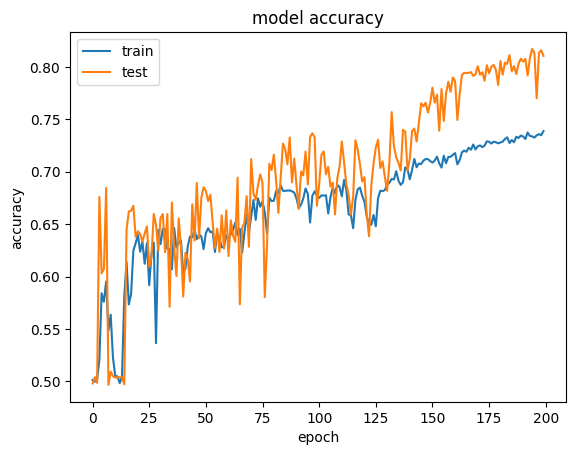

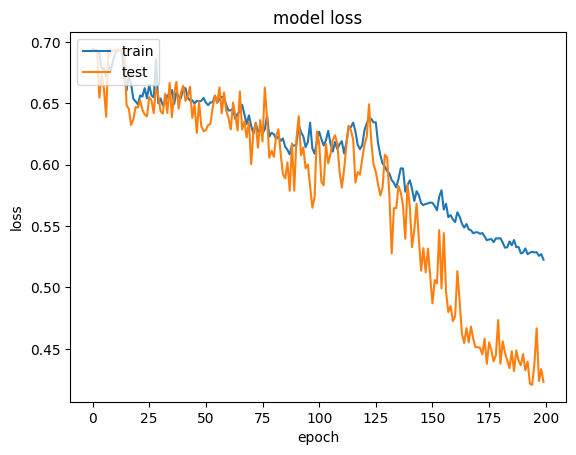

In [331]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()